In [1]:
import roman_phasec_proper
roman_phasec_proper.copy_here()
import proper

import numpy as np
import astropy.units as u
from IPython.display import clear_output
import time
from pathlib import Path
from matplotlib.patches import Circle

from importlib import reload
import misc

wavelength_c = 825e-9*u.m

npsf = 256
psf_pixelscale_lamD = 0.2

iwa = 5.9
owa = 20.1

# Define wavelength arrays for monochromatic and broadband PSFs
lam0 = wavelength_c.to(u.um).value

nlam = 3
bandwidth = 0.1
minlam = lam0 * (1 - bandwidth/2)
maxlam = lam0 * (1 + bandwidth/2)
lam_array_broad = np.linspace( minlam, maxlam, nlam )

# Options for testing without OPDs
options1 = {'cor_type':'spc-wide', # change coronagraph type to correct band
            'final_sampling_lam0':psf_pixelscale_lamD,
            'source_x_offset':0,
            'source_y_offset':0,
            'use_fpm':1,
            'use_field_stop':1,
            'use_pupil_defocus':1,
            'use_errors':0,
            'use_lens_errors':0,
            'use_hlc_dm_patterns':0,
            'use_dm1':0,
            'use_dm2':0,
            'polaxis':0,   
           }

options2 = {'cor_type':'spc-wide', # change coronagraph type to correct band
            'final_sampling_lam0':psf_pixelscale_lamD,
            'source_x_offset':0,
            'source_y_offset':0,
            'use_fpm':1,
            'use_field_stop':1,
            'use_pupil_defocus':1,
            'use_errors':1,
            'use_lens_errors':1,
            'use_hlc_dm_patterns':0,
            'use_dm1':0,
            'use_dm2':0,
            'polaxis':0,   
           }

data_dir = Path('/groups/douglase/kians-data-files/poppy-cupy-tests-data')
# misc.save_pickle(data_dir/'hlc_cpu_wfs_mono', wfs)

In [2]:
proper.prop_use_ffti(DISABLE=True, 
                     MKL_DIR='/opt/ohpc/pub/compiler/intel_2020_u4/compilers_and_libraries/linux/mkl/lib/intel64')
proper.prop_use_fftw(DISABLE=True)
# proper.prop_fftw_wisdom(1024)

# Test monochromatic PSFs

Lambda = 8.2500E-07   Throughput = 1.00
Applying lens
Propagating to secondary
Applying lens
Propagating to POMA FOLD
Propagating to M3
Applying lens
Propagating to M4
Applying lens
Propagating to M5
Applying lens
Propagating to TT FOLD
Propagating to FSM
Propagating to OAP1
Applying lens
Propagating to FOCM
Propagating to OAP2
Applying lens
Propagating to DM1
Propagating to DM2
Propagating to OAP3
Applying lens
Propagating to FOLD_3
Propagating to OAP4
Applying lens
Propagating to PUPIL_MASK
Propagating to OAP5
Applying lens
Propagating to FPM
Propagating to OAP6
Applying lens
Propagating to LYOT STOP
Propagating to OAP7
Applying lens
Propagating to FIELD_STOP
Propagating to OAP8
Applying lens
Propagating to filter
Propagating to IMAGING LENS
Applying lens at IMAGING LENS lens #1
Propagating
Applying lens at IMAGING LENS lens #2
Propagating to IMAGE
Total elapsed time (seconds) =  77.2288


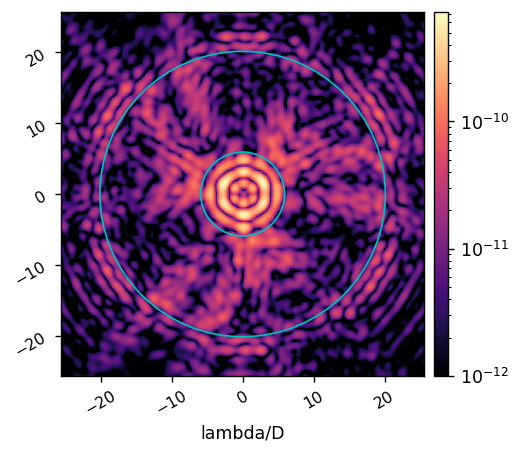

Saved data to:  /groups/douglase/kians-data-files/poppy-cupy-tests-data/spcw_proper_wfs_mono


In [3]:
# Without OPDs
wf, pxscl_m = proper.prop_run('roman_phasec', lam0, npsf, QUIET=False, PASSVALUE=options1)

psf_mono = np.abs(wf)**2

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.myimshow(psf_mono, lognorm=True, pxscl=0.2, patches=patches, vmin=1e-12)

misc.save_pickle(data_dir/'spcw_proper_wfs_mono', wf)

In [ ]:
%%timeit
wf, pxscl_m = proper.prop_run('roman_phasec', lam0, npsf, QUIET=True, PASSVALUE=options1)

Lambda = 8.2500E-07   Throughput = 1.00
Applying lens
Propagating to secondary
Applying lens
Propagating to POMA FOLD
Propagating to M3
Applying lens
Propagating to M4
Applying lens
Propagating to M5
Applying lens
Propagating to TT FOLD
Propagating to FSM
Propagating to OAP1
Applying lens
Propagating to FOCM
Propagating to OAP2
Applying lens
Propagating to DM1
Propagating to DM2
Propagating to OAP3
Applying lens
Propagating to FOLD_3
Propagating to OAP4
Applying lens
Propagating to PUPIL_MASK
Propagating to OAP5
Applying lens
Propagating to FPM
Propagating to OAP6
Applying lens
Propagating to LYOT STOP
Propagating to OAP7
Applying lens
Propagating to FIELD_STOP
Propagating to OAP8
Applying lens
Propagating to filter
Propagating to IMAGING LENS
Applying lens at IMAGING LENS lens #1
Propagating
Applying lens at IMAGING LENS lens #2
Propagating to IMAGE
Total elapsed time (seconds) =  85.0243


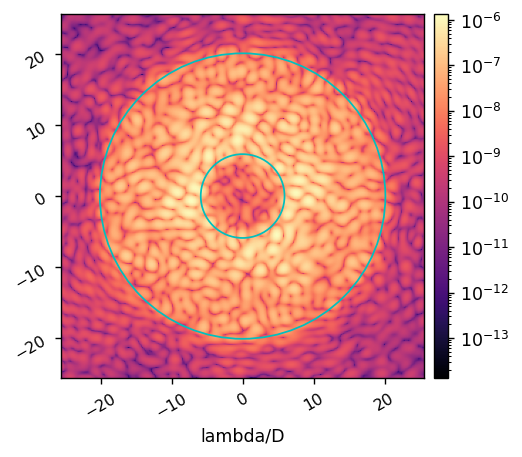

Saved data to:  /groups/douglase/kians-data-files/poppy-cupy-tests-data/spcw_proper_wfs_mono_opds


In [7]:
# With OPDs
wf, pxscl_m = proper.prop_run('roman_phasec', lam0, npsf, QUIET=False, PASSVALUE=options2)

psf_mono = np.abs(wf)**2

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.myimshow(psf_mono, lognorm=True, pxscl=psf_pixelscale_lamD, patches=patches)

misc.save_pickle(data_dir/'spcw_proper_wfs_mono_opds', wf)

In [ ]:
%%timeit
wf, pxscl_m = proper.prop_run('roman_phasec', lam0, npsf, QUIET=True, PASSVALUE=options2)

# Test broadband PSFs

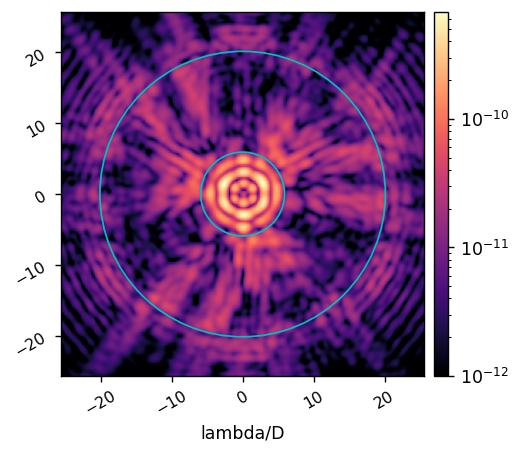

Saved data to:  /groups/douglase/kians-data-files/poppy-cupy-tests-data/spcw_proper_wfs_broad


In [8]:
# Without OPDs
wfs, pxscls_m = proper.prop_run_multi('roman_phasec', lam_array_broad, npsf, QUIET=True, PASSVALUE=options1)

psfs_mono = np.abs(wfs)**2
psf_broad = np.sum(psfs_mono, axis=0)/nlam

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.myimshow(psf_broad, lognorm=True, pxscl=psf_pixelscale_lamD, patches=patches, vmin=1e-12)

misc.save_pickle(data_dir/'spcw_proper_wfs_broad', wfs)

In [ ]:
%%timeit
wfs, pxscls_m = proper.prop_run_multi('roman_phasec', lam_array_broad, npsf, QUIET=True, PASSVALUE=options1)

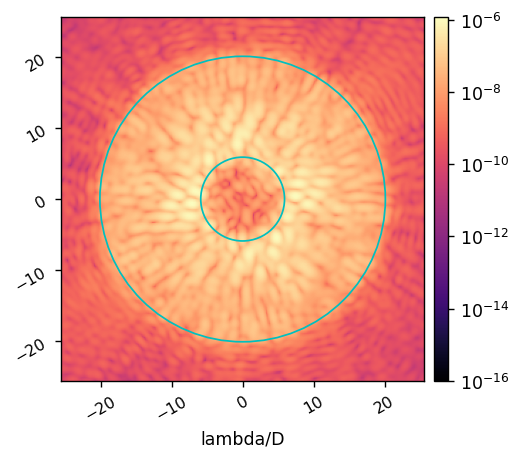

Saved data to:  /groups/douglase/kians-data-files/poppy-cupy-tests-data/spcw_proper_wfs_broad_opds


In [9]:
# With OPDs
wfs, pxscls_m = proper.prop_run_multi('roman_phasec', lam_array_broad, npsf, QUIET=True, PASSVALUE=options2)

psfs_mono = np.abs(wfs)**2
psf_broad = np.sum(psfs_mono, axis=0)/nlam

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.myimshow(psf_broad, lognorm=True, pxscl=psf_pixelscale_lamD, patches=patches, vmin=1e-16)

misc.save_pickle(data_dir/'spcw_proper_wfs_broad_opds', wfs)

In [ ]:
%%timeit
wfs, pxscls_m = proper.prop_run_multi('roman_phasec', lam_array_broad, npsf, QUIET=True, PASSVALUE=options2)